In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam



2025-02-28 12:17:15.393351: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-28 12:17:15.402870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740725235.413798  894352 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740725235.416931  894352 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 12:17:15.427741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# data generator
train_dataset = keras.utils.image_dataset_from_directory(
    directory = './train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = './test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

Found 20000 files belonging to 2 classes.


I0000 00:00:1740725321.298589  894352 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 5000 files belonging to 2 classes.


In [3]:
#normalize the images to [0,1]
def normalize_images(image, label):
    return image/255, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)

In [4]:
# create the CNN architecture
# first we will try with tanh as activation then we will try with relu

model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/home/harry/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# fit the model
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=test_dataset)

Epoch 1/10


I0000 00:00:1740725345.585543  894692 service.cc:148] XLA service 0x7fe2f000cc30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740725345.585638  894692 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-02-28 12:19:05.657680: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740725346.078145  894692 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.4609 - loss: 1.2017   

I0000 00:00:1740725359.384100  894692 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 125ms/step - accuracy: 0.5875 - loss: 0.7207 - val_accuracy: 0.6690 - val_loss: 0.6089
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.6944 - loss: 0.5791 - val_accuracy: 0.7194 - val_loss: 0.5466
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7433 - loss: 0.5191 - val_accuracy: 0.7450 - val_loss: 0.5134
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.7824 - loss: 0.4623 - val_accuracy: 0.7536 - val_loss: 0.4986
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8108 - loss: 0.4150 - val_accuracy: 0.7670 - val_loss: 0.4872
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - accuracy: 0.8418 - loss: 0.3699 - val_accuracy: 0.7742 - val_loss: 0.4815
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8692 - loss: 0.3262 - val_accuracy: 0.7718 - val_loss: 0.4920
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.8922 - loss: 0.2783 - val

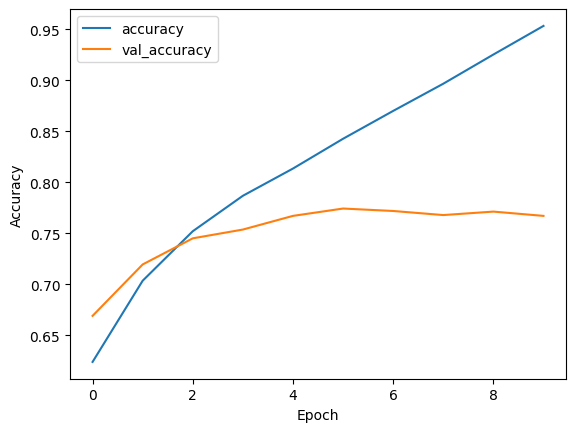

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# we see from the above plot that overfitting is happening. So we will try with early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 108ms/step - accuracy: 0.6057 - loss: 0.6629 - val_accuracy: 0.7022 - val_loss: 0.5709
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.7148 - loss: 0.5519 - val_accuracy: 0.7448 - val_loss: 0.5178
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.7646 - loss: 0.4919 - val_accuracy: 0.7608 - val_loss: 0.4891
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - accuracy: 0.7963 - loss: 0.4471 - val_accuracy: 0.7790 - val_loss: 0.4679
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.8211 - loss: 0.4041 - val_accuracy: 0.7730 - val_loss: 0.4731
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8425 - loss: 0.3660 - val_accuracy: 0.7736 - val_loss: 0.4810
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8652 - loss: 0.3276 - val_accuracy: 0.7690 - val_loss: 0.4970


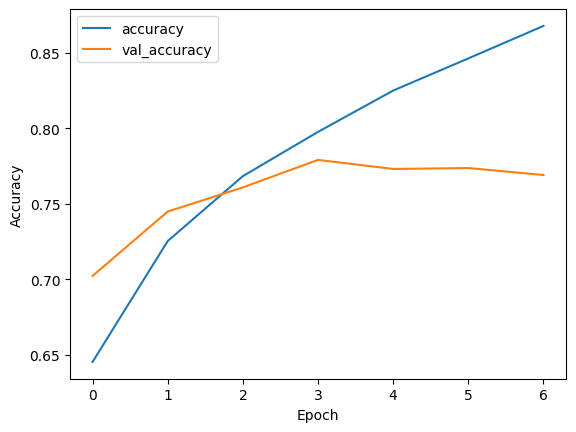

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()